In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'S:\\Grid_Orientation\\LISFLOOD_FP\\Analysis')

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import seaborn as sns                                       # For plotting
import pandas as pd                                         # For reading data

from comparison import get_datalist, statistic_df_dict, \
                       boxplotting, kdeplotting             # For boxplotting and kdeplotting

#### 1. Get data

In [3]:
building_path = fr"S:\new_versions\data\buildings\lds-nz-building-outlines-all-sources-SHP_002.zip"

In [4]:
list_filename = [
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv",
    r"S:\\new_versions\\vers17\\5_analysis\\untransformed_csv\\all_simulations.csv"
]

name = [
    'vers1',
    'vers2',
    'vers3',
    'vers4',
    'vers5',
    'vers6',
    'vers7',
    'vers8',
    'vers9',
    'vers10'
]

list_resolution = [10]

In [5]:
%%time
trans_datasets = get_datalist(
    list_filename,
    list_resolution,
    building_path,
    0.1
)

trans_comparison = statistic_df_dict(
    name,
    trans_datasets
)

CPU times: total: 22.5 s
Wall time: 23.2 s


In [6]:
# Manipulate to get fake data
data = trans_comparison['mean'].copy(deep=True)
for i in range(9):
    data[f'vers{i+1}'] = data[f'vers{i+1}']*(1+0.1*i)

#### 2. Execution

#### 2.1. Boxplots

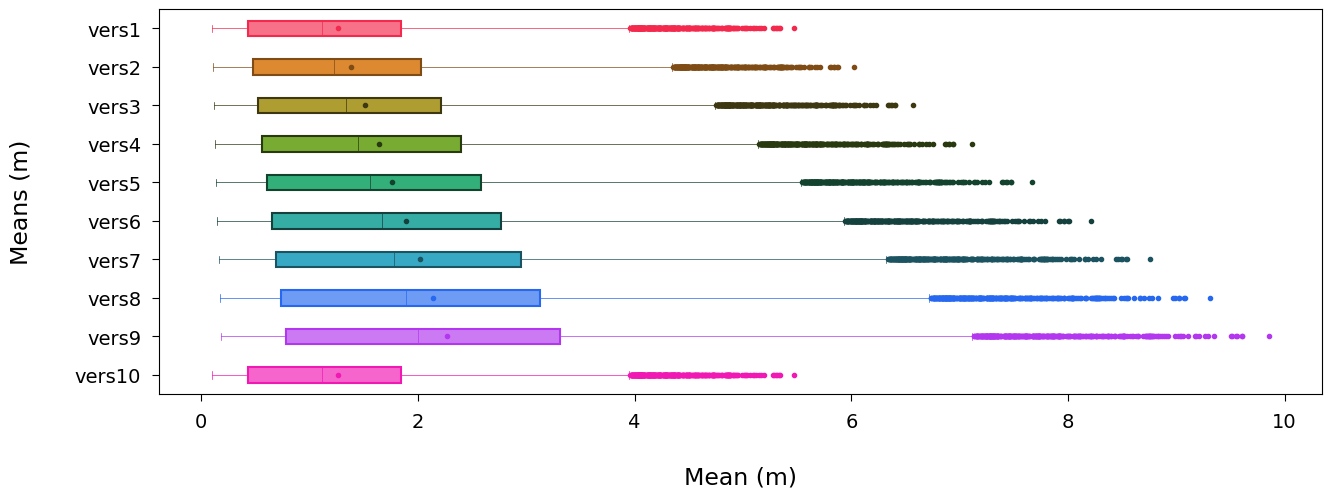

In [7]:
boxplotting(
    (15, 5),
    data,
    'Means (m)',
    'mean'
)

#### 2.2. Density

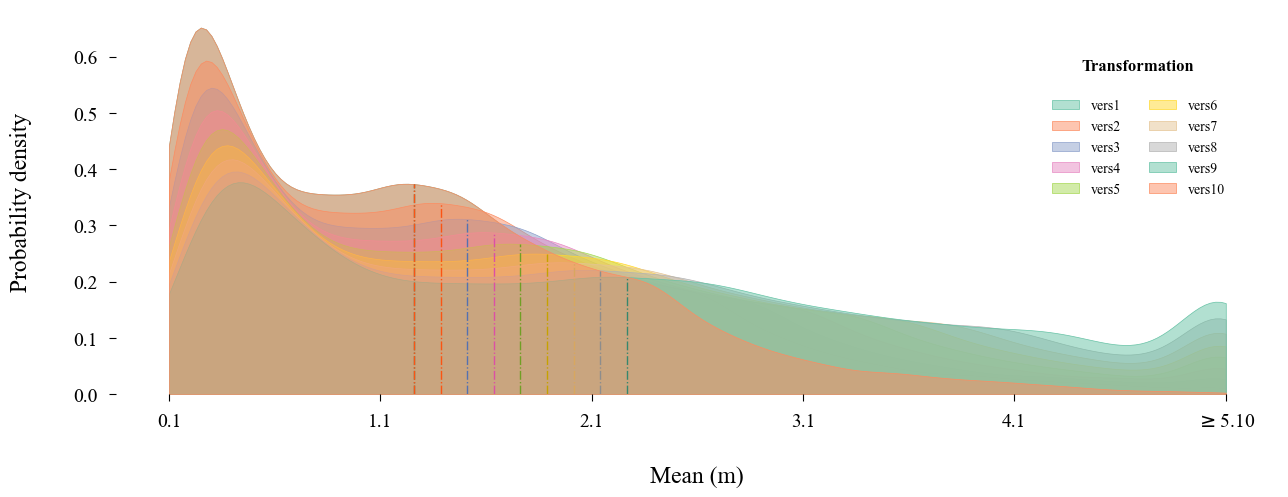

In [8]:
kdeplotting(
    (15, 5),
    data,
    [0.1, 5.1, 1],
    'Transformation\n',
    [0.8, 0.5],
    'mean',
    r'$\geq $',
    'Set2'
)